# Methods for editing strings in Pandas

In [1]:
import numpy as np
import pandas as pd

s_1 = pd.Series(["A","b","B","gear","AGER",np.nan])
s_1

0       A
1       b
2       B
3    gear
4    AGER
5     NaN
dtype: object

In [2]:
s_1.str.lower()

0       a
1       b
2       b
3    gear
4    ager
5     NaN
dtype: object

In [3]:
s_1.str.upper()

0       A
1       B
2       B
3    GEAR
4    AGER
5     NaN
dtype: object

In [4]:
s_1.str.len()

0    1.0
1    1.0
2    1.0
3    4.0
4    4.0
5    NaN
dtype: float64

In [5]:
idx = pd.Index(["    xp","xp    ", "xp"])
idx

Index(['    xp', 'xp    ', 'xp'], dtype='object')

In [6]:
idx.str.strip()

Index(['xp', 'xp', 'xp'], dtype='object')

In [7]:
idx.str.lstrip()

Index(['xp', 'xp    ', 'xp'], dtype='object')

In [8]:
idx.str.rstrip()

Index(['    xp', 'xp', 'xp'], dtype='object')

In [9]:
data_1 = pd.DataFrame(np.random.randn(3,2), columns=["A a", "B b"], index=range(3))
data_1

,A a,B b
0,0.897439,-1.26444
1,-0.102060,-0.63607
2,0.035386,-0.73216


In [10]:
data_1.columns = data_1.columns.str.replace(" ","_")
data_1

,A_a,B_b
0,0.897439,-1.26444
1,-0.102060,-0.63607
2,0.035386,-0.73216


In [11]:
s_2 = pd.Series(["a b c", "d e f", "g h i"])
s_2

0    a b c
1    d e f
2    g h i
dtype: object

In [12]:
s_2.str.split(" ")

0    [a, b, c]
1    [d, e, f]
2    [g, h, i]
dtype: object

In [13]:
s_2.str.split(" ", expand=True)

,0,1,2
0,a,b,c
1,d,e,f
2,g,h,i


In [14]:
s_2.str.split(" ", expand=True, n=1)

,0,1
0,a,b c
1,d,e f
2,g,h i


In [15]:
s_2.str.split(" ", expand=True, n=1)

,0,1
0,a,b c
1,d,e f
2,g,h i


In [18]:
s_3 = pd.Series(["A","As","Asd","Asdfg"])
s_3

0        A
1       As
2      Asd
3    Asdfg
dtype: object

In [19]:
s_3.str.contains("Asd")

0    False
1    False
2     True
3     True
dtype: bool

In [20]:
s_3.str.contains("Aa")

0    False
1    False
2    False
3    False
dtype: bool

In [21]:
s_3.str.contains("A")

0    True
1    True
2    True
3    True
dtype: bool

# Advanced indexing methods in Pandas

In [22]:
s_1 = pd.Series(np.arange(5), index=np.arange(5)[::-1], dtype="int64")

In [23]:
s_1

4    0
3    1
2    2
1    3
0    4
dtype: int64

In [24]:
s_1.isin([1,2,4])

4    False
3     True
2     True
1    False
0     True
dtype: bool

In [25]:
s_1[s_1.isin([1,2,4])]

3    1
2    2
0    4
dtype: int64

In [26]:
s_2 = pd.Series(np.arange(6), index=pd.MultiIndex.from_product([[0,1],["a","b","c"]]))
s_2

0  a    0
   b    1
   c    2
1  a    3
   b    4
   c    5
dtype: int32

In [27]:
s_2.iloc[s_2.index.isin([(1,"a"),(0,"b")])]

0  b    1
1  a    3
dtype: int32

In [28]:
dates = pd.date_range("20181121", periods=8)
data_1 = pd.DataFrame(np.random.randn(8,4), columns=["A","B","C","D"], index=dates)
data_1

,A,B,C,D
2018-11-21,-0.511435,-0.264350,1.137674,0.228832
2018-11-22,1.525868,-1.138135,-0.387224,-0.171902
2018-11-23,1.323109,0.343328,1.695239,1.103486
2018-11-24,-2.193289,-0.138588,-1.649394,-1.864759
2018-11-25,-0.891637,1.618938,1.140595,0.643799
2018-11-26,-0.390678,-0.729711,-0.270697,-0.441789
2018-11-27,0.859532,0.139106,-1.857454,-0.851773
2018-11-28,0.454174,2.123270,-0.038595,1.250827


In [29]:
data_1.where(data_1 < 0)

,A,B,C,D
2018-11-21,-0.511435,-0.264350,NaN,NaN
2018-11-22,NaN,-1.138135,-0.387224,-0.171902
2018-11-23,NaN,NaN,NaN,NaN
2018-11-24,-2.193289,-0.138588,-1.649394,-1.864759
2018-11-25,-0.891637,NaN,NaN,NaN
2018-11-26,-0.390678,-0.729711,-0.270697,-0.441789
2018-11-27,NaN,NaN,-1.857454,-0.851773
2018-11-28,NaN,NaN,-0.038595,NaN


In [30]:
data_2 = pd.DataFrame(np.random.rand(10,3), columns=list("abc"))
data_2

,a,b,c
0,0.918843,0.896452,0.223336
1,0.441739,0.297655,0.137703
2,0.864539,0.285126,0.006528
3,0.399568,0.468795,0.288397
4,0.678589,0.377684,0.960724
5,0.982432,0.369929,0.535840
6,0.848534,0.759683,0.207495
7,0.574063,0.885963,0.676181
8,0.877813,0.500869,0.803667
9,0.453724,0.345752,0.455044


In [31]:
data_2.query("(a<b)")

,a,b,c
3,0.399568,0.468795,0.288397
7,0.574063,0.885963,0.676181


In [32]:
data_2.query("(a<b) & (b<c)")

,a,b,c


# Create graphs in Pandas

In [33]:
%matplotlib inline

<AxesSubplot:>

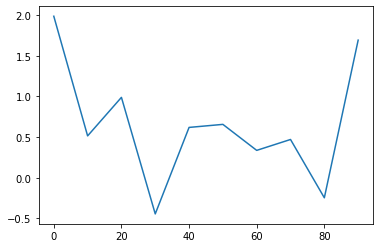

In [34]:
s_1 = pd.Series(np.random.randn(10), index=np.arange(0,100,10))
s_1.plot()

In [35]:
data_1 = pd.DataFrame(np.random.randn(10,4),
                     index = np.arange(0,100,10),
                     columns = ["A","B","C","D"])
data_1.head()

,A,B,C,D
0,-0.718056,-1.021388,0.066561,-0.164194
10,0.716577,0.204610,-0.815616,-0.260264
20,0.167418,-0.228227,-0.248860,1.284459
30,1.075483,0.345961,0.073788,0.217204
40,-0.780248,-0.239885,0.006299,0.784846


<AxesSubplot:>

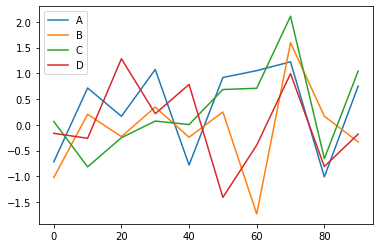

In [36]:
data_1.plot()

In [37]:
import matplotlib.pyplot as plt

<AxesSubplot:>

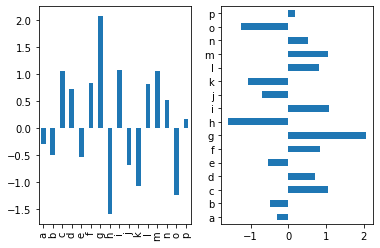

In [38]:
data = pd.Series(np.random.randn(16), index=list("abcdefghijklmnop"))
fig,axes = plt.subplots(1,2)
data.plot(ax=axes[0], kind="bar")
data.plot(ax=axes[1], kind="barh")

In [39]:
data_2 = pd.DataFrame(np.random.randn(6,4),
                     index = ["one","two","three","four","five","six"],
                     columns = pd.Index(["A","B","C","D"], name="genius"))
data_2.head()

genius,A,B,C,D
one,1.017589,-0.449170,0.664439,-0.965234
two,-0.765176,-2.980515,-1.603402,1.121667
three,-0.301394,-1.500926,-0.444791,0.226884
four,0.483642,-1.937892,0.896354,-2.179205
five,-0.316321,1.435057,-1.519203,-2.601768


<AxesSubplot:>

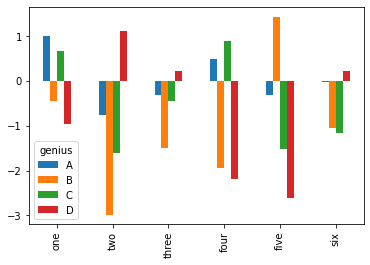

In [40]:
data_2.plot(kind="bar")